In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random
from collections import Counter

In [3]:
# Dataset path
dataset_path = '/Users/ayush/Desktop/Ran Final/brain-tumor-mri-dataset'

# Subfolder (class) names
categories = os.listdir(dataset_path)
print("Classes in the dataset:", categories)

Classes in the dataset: ['pituitary', '.DS_Store', 'notumor', 'glioma', 'meningioma']


Number of images in each class: {'pituitary': 1757, 'notumor': 2000, 'glioma': 1621, 'meningioma': 1775}


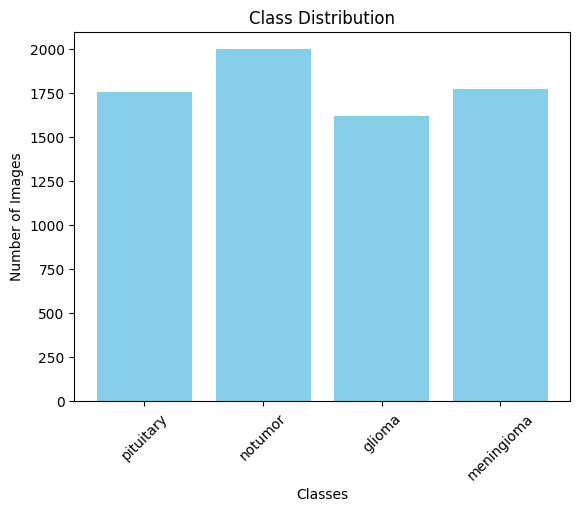

In [5]:
# Count number of images in each class
image_counts = {
    category: len(os.listdir(os.path.join(dataset_path, category)))
    for category in categories
    if os.path.isdir(os.path.join(dataset_path, category))  # Check if it's a directory
}

print("Number of images in each class:", image_counts)

# Plot class distribution
plt.bar(image_counts.keys(), image_counts.values(), color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

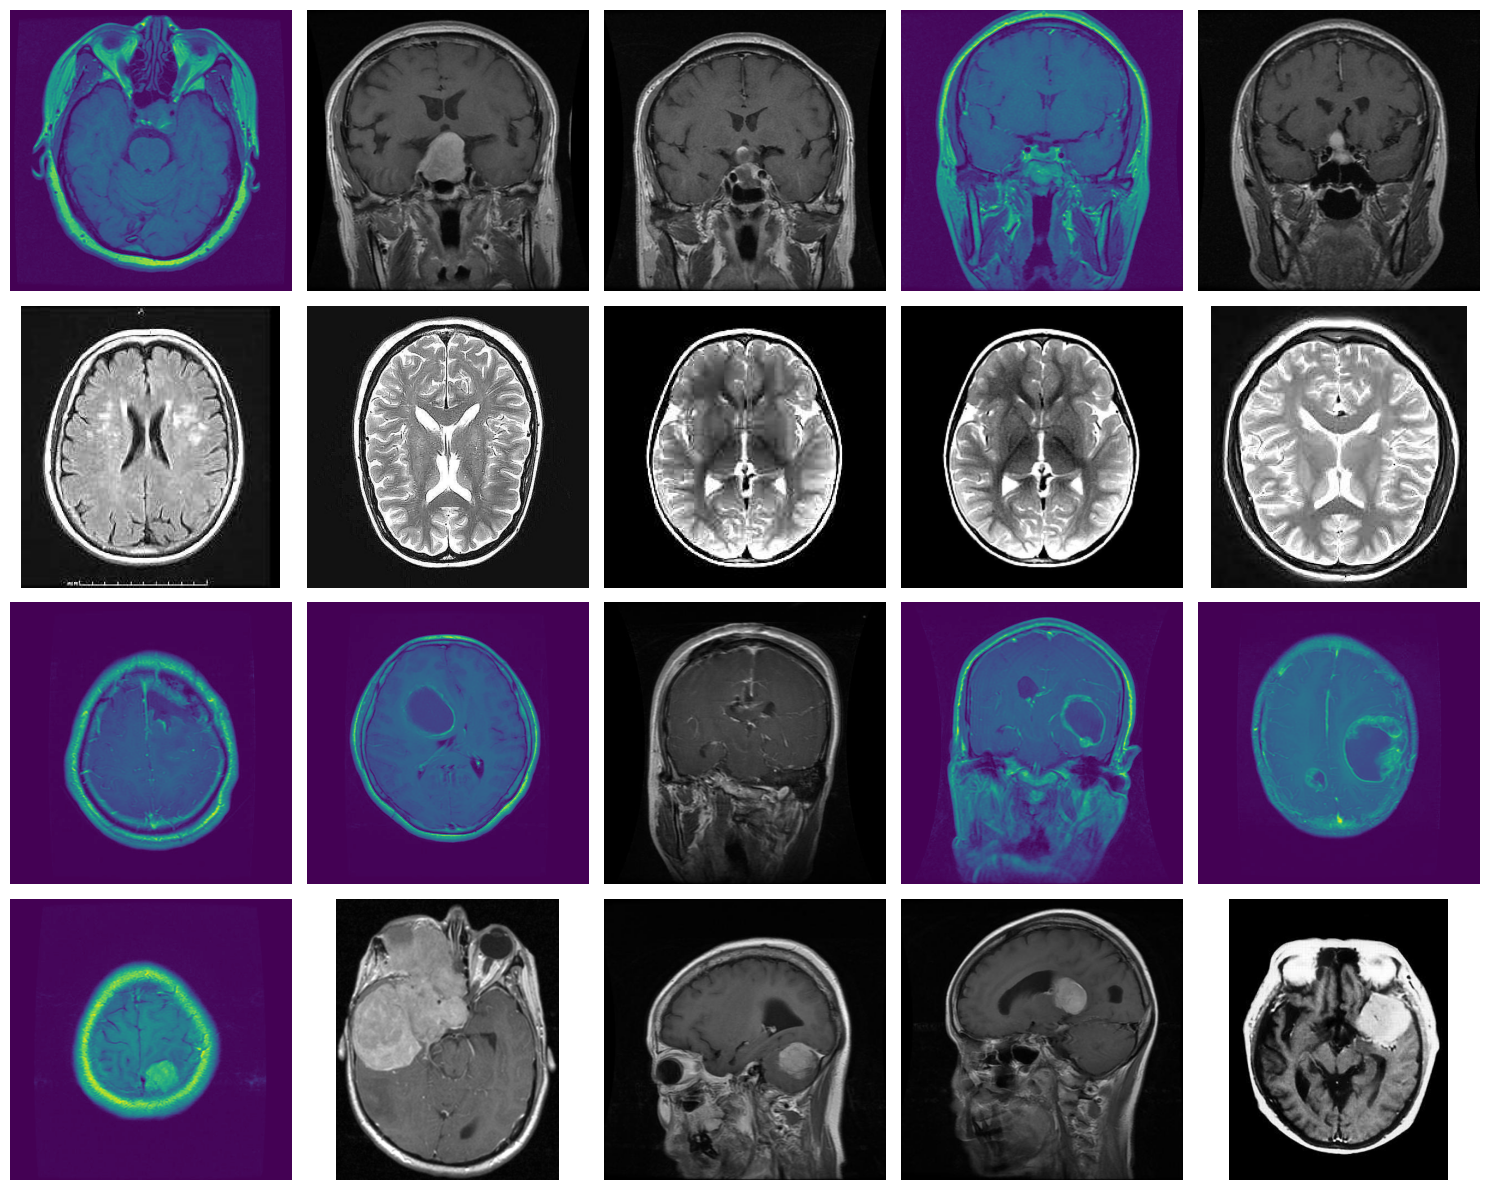

In [7]:
# Display 5 random images from each category
def display_sample_images(dataset_path, categories, num_samples=5):
    plt.figure(figsize=(15, len(categories) * 3))
    for i, category in enumerate(categories):
        category_path = os.path.join(dataset_path, category)
        if not os.path.isdir(category_path):  # Skip non-directory entries
            continue
        images = random.sample(os.listdir(category_path), num_samples)
        for j, img_name in enumerate(images):
            img_path = os.path.join(category_path, img_name)
            img = Image.open(img_path)
            plt.subplot(len(categories), num_samples, i * num_samples + j + 1)
            plt.imshow(img)
            plt.axis('off')
            if j == 0:
                plt.ylabel(category, fontsize=14)
    plt.tight_layout()
    plt.show()

# Call the function
categories = [cat for cat in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, cat))]
display_sample_images(dataset_path, categories, num_samples=5)

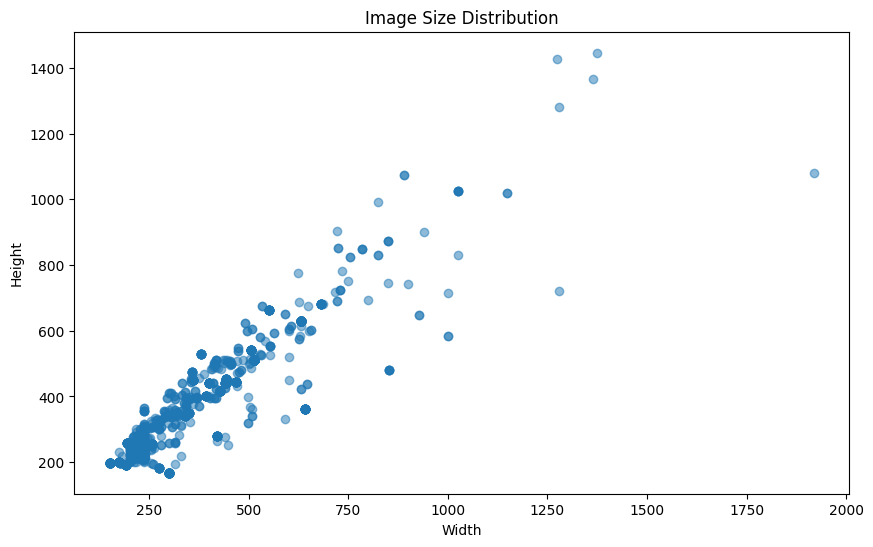

Most common image size: ((512, 512), 4859)


In [8]:
# Analyze image sizes
image_sizes = []
for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        with Image.open(img_path) as img:
            image_sizes.append(img.size)

# Plot distribution of image sizes
widths, heights = zip(*image_sizes)
plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, alpha=0.5)
plt.title('Image Size Distribution')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

print(f"Most common image size: {Counter(image_sizes).most_common(1)[0]}")

In [9]:
# Check for duplicate images
image_hashes = set()
duplicate_count = 0

for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        with Image.open(img_path) as img:
            img_hash = hash(img.tobytes())  # Hash of image data
            if img_hash in image_hashes:
                duplicate_count += 1
            else:
                image_hashes.add(img_hash)

print(f"Number of duplicate images: {duplicate_count}")

Number of duplicate images: 556


In [10]:
import os
from PIL import Image

# Path to dataset
dataset_path = '/Users/ayush/Desktop/Ran Final/brain-tumor-mri-dataset'

# Create a backup folder for duplicates
duplicates_backup_path = '/Users/ayush/Desktop/Ran Final/duplicates_backup'
os.makedirs(duplicates_backup_path, exist_ok=True)

# Identify and remove duplicates
image_hashes = set()
duplicate_count = 0

for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if not os.path.isdir(category_path):  # Skip non-directories
        continue
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            with Image.open(img_path) as img:
                img_hash = hash(img.tobytes())  # Generate hash of the image
                if img_hash in image_hashes:
                    # Move duplicate to backup folder
                    duplicate_count += 1
                    duplicate_backup_path = os.path.join(duplicates_backup_path, img_name)
                    os.rename(img_path, duplicate_backup_path)
                else:
                    image_hashes.add(img_hash)
        except Exception as e:
            print(f"Error processing file {img_path}: {e}")

print(f"Number of duplicates removed: {duplicate_count}")

Number of duplicates removed: 556


In [11]:
import os
import random
import shutil

# Path to the cleaned dataset
dataset_path = '/Users/ayush/Desktop/Ran Final/brain-tumor-mri-dataset'

# Paths for train and test datasets
train_path = '/Users/ayush/Desktop/Ran Final/train'
test_path = '/Users/ayush/Desktop/Ran Final/test'

# Create directories for train and test datasets
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Train-test split ratio
split_ratio = 0.8

# Split data
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if not os.path.isdir(category_path):  # Skip non-directory files
        continue
    
    # Create category folders in train and test directories
    train_category_path = os.path.join(train_path, category)
    test_category_path = os.path.join(test_path, category)
    os.makedirs(train_category_path, exist_ok=True)
    os.makedirs(test_category_path, exist_ok=True)
    
    # List all images in the category
    images = os.listdir(category_path)
    random.shuffle(images)  # Shuffle images for random splitting
    
    # Split images into train and test
    split_index = int(len(images) * split_ratio)
    train_images = images[:split_index]
    test_images = images[split_index:]
    
    # Move images to respective directories
    for img_name in train_images:
        shutil.copy(os.path.join(category_path, img_name), os.path.join(train_category_path, img_name))
    for img_name in test_images:
        shutil.copy(os.path.join(category_path, img_name), os.path.join(test_category_path, img_name))

print("Dataset has been split into train and test sets.")

Dataset has been split into train and test sets.


In [12]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = train_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5276 images belonging to 4 classes.
Found 1321 images belonging to 4 classes.


In [13]:
# Training set distribution
for cls, count in train_generator.class_indices.items():
    print(f"{cls}: {len(train_generator.filepaths)} images")

# Test set distribution
for cls, count in test_generator.class_indices.items():
    print(f"{cls}: {len(test_generator.filepaths)} images")

glioma: 5276 images
meningioma: 5276 images
notumor: 5276 images
pituitary: 5276 images
glioma: 1321 images
meningioma: 1321 images
notumor: 1321 images
pituitary: 1321 images


In [14]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10  # You can adjust the number of epochs as needed
)

Epoch 1/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 39s 232ms/step - accuracy: 0.7901 - loss: 0.5355 - val_accuracy: 0.8077 - val_loss: 0.4909
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 36s 216ms/step - accuracy: 0.7979 - loss: 0.5219 - val_accuracy: 0.8107 - val_loss: 0.4608
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 36s 217ms/step - accuracy: 0.8100 - loss: 0.4940 - val_accuracy: 0.8100 - val_loss: 0.4960
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 36s 218ms/step - accuracy: 0.8189 - loss: 0.4798 - val_accuracy: 0.8213 - val_loss: 0.4259
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 36s 216ms/step - accuracy: 0.8290 - loss: 0.4476 - val_accuracy: 0.8456 - val_loss: 0.4088
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 37s 225ms/step - accuracy: 0.8395 - loss: 0.4176 - val_accuracy: 0.8266 - val_loss: 0.4239
Epoch 7/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 36s 216ms/step - accuracy: 0.8479 - loss: 0.3943 - val_accuracy: 0.8486 - val_loss: 0.4045
Epoch 8/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 36s 216ms/step - accuracy: 0.8501 - loss: 0

In [15]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.8437 - loss: 0.3905
Test Accuracy: 85.09%


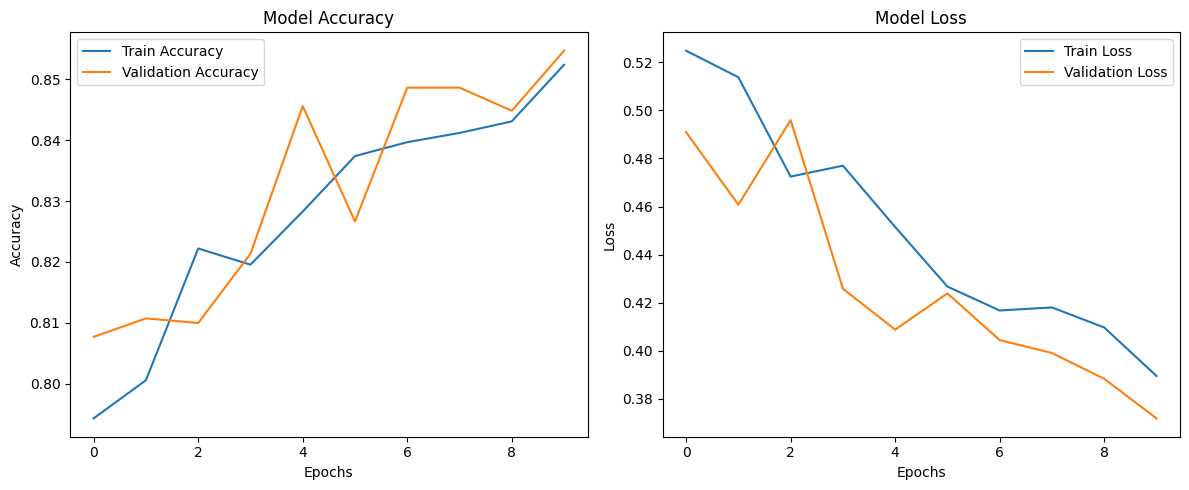

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('brain_tumor_model.h5')

# Class labels (adjust based on your training dataset's class indices)
class_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Function to preprocess the image
def preprocess_image(image_path, img_height=150, img_width=150):
    # Load the image
    img = load_img(image_path, target_size=(img_height, img_width))
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    # Add a batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to predict tumor type
def predict_tumor(image_path):
    # Preprocess the input image
    processed_image = preprocess_image(image_path)
    # Get prediction probabilities
    predictions = model.predict(processed_image)
    # Get the class with the highest probability
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class]
    return class_labels[predicted_class], confidence

# Test the function (Replace with your actual image path)
image_path = '/Users/ayush/Desktop/Ran Final/check.jpg'
predicted_class, confidence = predict_tumor(image_path)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Class: notumor, Confidence: 98.16%


In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('brain_tumor_model.h5')

# Class labels (adjust based on your training dataset's class indices)
class_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Function to preprocess the image
def preprocess_image(image_path, img_height=150, img_width=150):
    # Load the image
    img = load_img(image_path, target_size=(img_height, img_width))
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    # Add a batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to predict tumor type
def predict_tumor(image_path):
    # Preprocess the input image
    processed_image = preprocess_image(image_path)
    # Get prediction probabilities
    predictions = model.predict(processed_image)
    # Get the class with the highest probability
    predicted_class_index = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class_index]

    # Map index to class label (adjust as needed)
    class_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
    predicted_class = class_labels[predicted_class_index]

    # Check if it's a tumor or notumor
    if predicted_class in ['glioma', 'meningioma', 'pituitary']:
        tumor_prediction = "Tumor"
    else:
        tumor_prediction = "Not Tumor"

    return tumor_prediction, confidence

# Test the function
image_path = '/Users/ayush/Desktop/Ran Final/check5.jpg'  # Provide the path to the MRI image
tumor_prediction, confidence = predict_tumor(image_path)
print(f"Prediction: {tumor_prediction}, Confidence: {confidence * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction: Not Tumor, Confidence: 96.68%


In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('brain_tumor_model.h5')

# Class labels (adjust based on your training dataset's class indices)
class_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Function to preprocess the image
def preprocess_image(image_path, img_height=150, img_width=150):
    # Load the image
    img = load_img(image_path, target_size=(img_height, img_width))
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    # Add a batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to predict tumor type
def predict_tumor(image_path):
    # Preprocess the input image
    processed_image = preprocess_image(image_path)
    # Get prediction probabilities
    predictions = model.predict(processed_image)
    # Get the class with the highest probability
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_labels[predicted_class_index]
    confidence = predictions[0][predicted_class_index]

    return predicted_class, confidence

# Test the function
image_path = '/Users/ayush/Desktop/Ran Final/check9.jpg'  # Provide the path to the MRI image
predicted_class, confidence = predict_tumor(image_path)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Class: meningioma, Confidence: 81.62%


In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ... (data preprocessing and loading)

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes: glioma, meningioma, notumor, pituitary
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Save the model
model.save('brain_tumor_classifier.h5')

# Load the saved model
model = tf.keras.models.load_model('brain_tumor_classifier.h5')

# Make a prediction
img_path = 'path/to/your/image.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])

# Map the predicted class index to the class label
class_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
predicted_class = class_labels[np.argmax(classes[0])]
print(f"Predicted class: {predicted_class}")

/Users/ayush/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'validation_generator' is not defined

Found 5723 images belonging to 4 classes.
Found 1430 images belonging to 4 classes.
Class Indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


/Users/ayush/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/ayush/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.3957 - loss: 1.2686

/Users/ayush/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 44s 240ms/step - accuracy: 0.3962 - loss: 1.2678 - val_accuracy: 0.6161 - val_loss: 0.8778
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 40s 224ms/step - accuracy: 0.5996 - loss: 0.9236 - val_accuracy: 0.6399 - val_loss: 0.8107
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 220ms/step - accuracy: 0.6486 - loss: 0.8458 - val_accuracy: 0.7098 - val_loss: 0.6981
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 42s 233ms/step - accuracy: 0.6943 - loss: 0.7478 - val_accuracy: 0.7280 - val_loss: 0.6728
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 40s 223ms/step - accuracy: 0.7121 - loss: 0.7151 - val_accuracy: 0.7357 - val_loss: 0.6595
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 218ms/step - accuracy: 0.7264 - loss: 0.6702 - val_accuracy: 0.7231 - val_loss: 0.6233
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 40s 225ms/step - accuracy: 0.7395 - loss: 0.6552 - val_accuracy: 0.7888 - val_loss: 0.5498
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 40s 222ms/step - accuracy: 0.7565 - loss: 0.6000 - val

Validation Accuracy: 80.56%


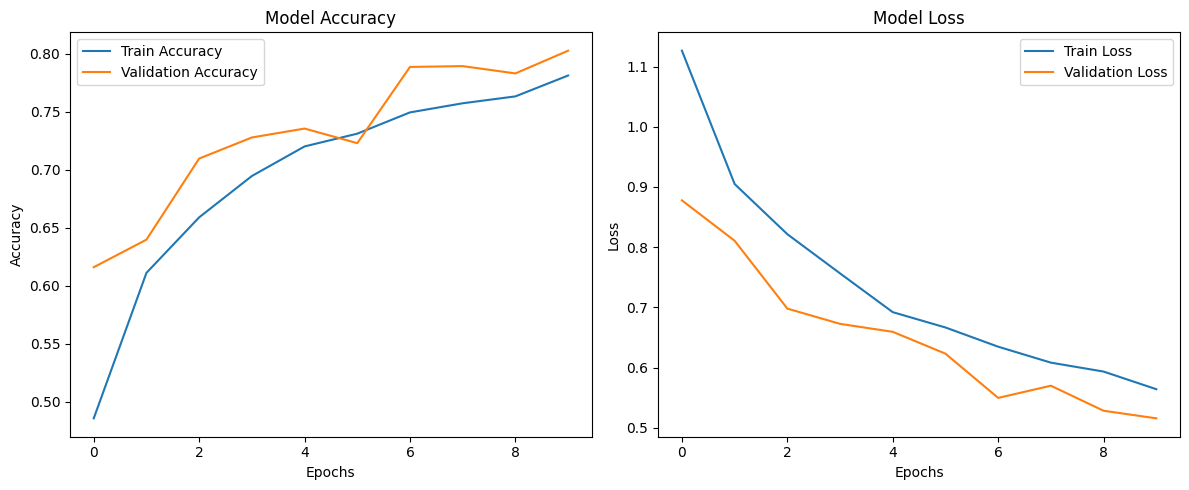

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Dataset Path
dataset_path = '/Users/ayush/Desktop/Ran Final/brain-tumor-mri-dataset'

# Image Parameters
img_height, img_width = 150, 150  # Resize all images to 150x150
batch_size = 32

# Data Augmentation and Data Preparation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data for validation
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Display class indices
print("Class Indices:", train_generator.class_indices)

# Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
epochs = 10  # Adjust epochs as needed
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# Evaluate the Model
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

# Save the Model
model.save('brain_tumor_model.h5')

# Plot Training History
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()